In [20]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Import king county data from Data folder

data = pd.read_csv('Data/kc_house_data.csv')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

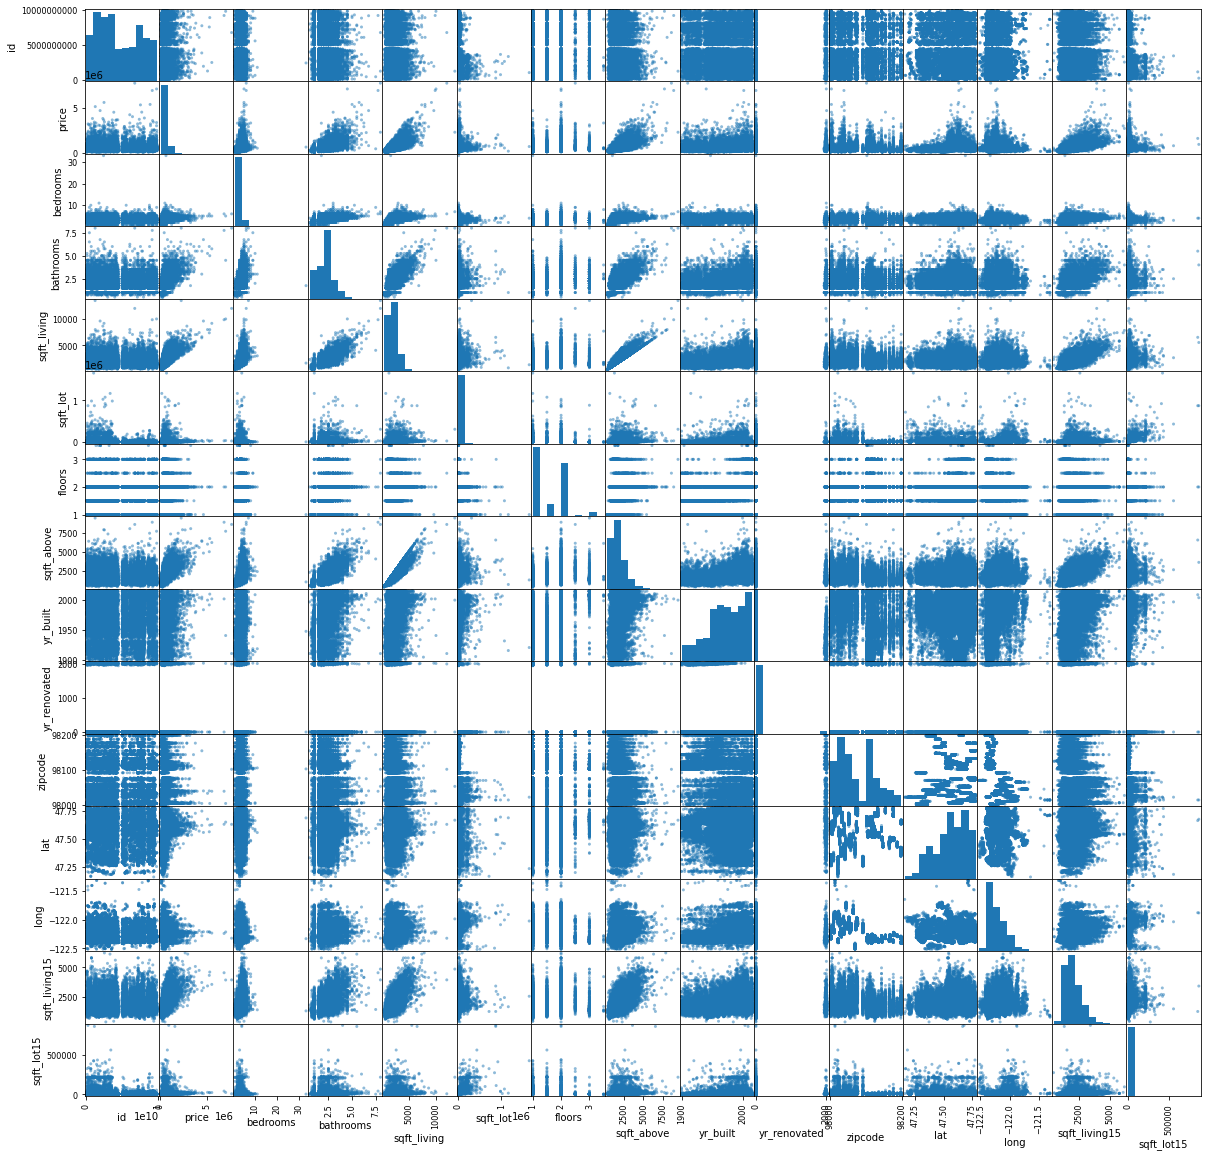

In [25]:
pd.plotting.scatter_matrix(data, figsize=(20,20));

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


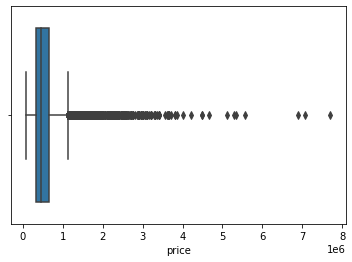

In [26]:
# The price variable looks skewed base on histogram; check distribution

fig, ax = plt.subplots()

sns.boxplot(data['price'], ax=ax);

For our purposes, we do not need to consider houses with prices greater than $1 million.

In [27]:
# drop records with price greater than $1000000

data = data.loc[ data['price'] <= 1000000 ]

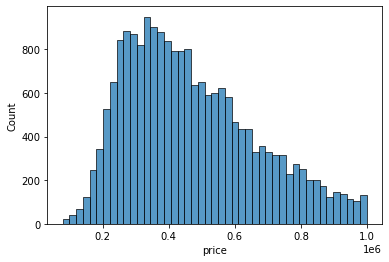

In [28]:
# re-check distribution of price

fig, ax = plt.subplots()

sns.histplot(data['price']);

Price is still skewed, but much less so.

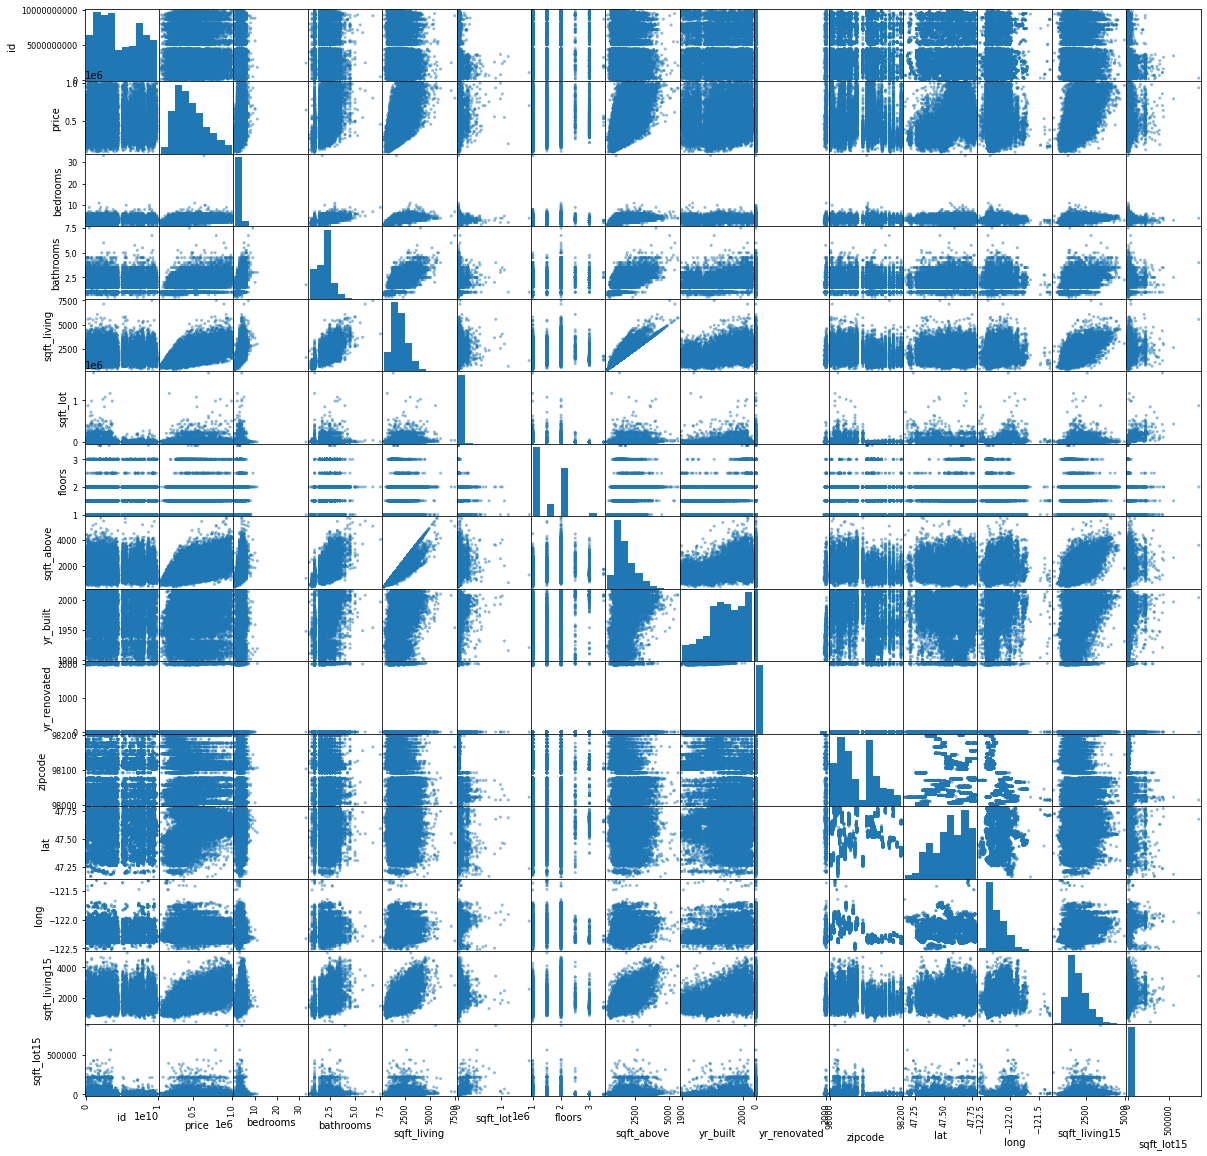

In [29]:
pd.plotting.scatter_matrix(data, figsize=(20,20));

In [30]:
# check for missing values

data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2227
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3577
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Waterfront

In [33]:
data.waterfront.value_counts()

NO     17862
YES       50
Name: waterfront, dtype: int64

#### View

In [34]:
data.view.value_counts()

NONE         18611
AVERAGE        763
GOOD           319
FAIR           260
EXCELLENT      129
Name: view, dtype: int64

#### Fill Null Values: Waterfront & View

In [48]:
# assume no waterfront, no view, if not specified

data.waterfront.fillna('NO', inplace=True)
data.view.fillna('NONE', inplace=True)

#### Yr_renovated

In [36]:
data.yr_renovated.value_counts()

0.0       15962
2014.0       63
2013.0       27
2000.0       25
2007.0       23
          ...  
1956.0        1
1948.0        1
1971.0        1
1953.0        1
1934.0        1
Name: yr_renovated, Length: 70, dtype: int64

#### Fill null values, engineer new feature and drop yr_renovated

In [45]:
# engineer new feature, renovated, then drop yr_renovated

# assume not renovated if not specified
data.yr_renovated.fillna(0, inplace=True)

# create renovated flag, set to true
data['renovated'] = 1
# set renovated flag to false for houses with yr_renovated value of 0
data.loc[ data['yr_renovated'] == 0, 'renovated'] = 0

# drop yr_renovated
data.drop('yr_renovated', axis=1, inplace=True)

In [50]:
# check data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [51]:
data.date.head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [60]:
# create month feature
data['mo_sold'] = data.date.map(lambda x: x.split('/')[0])

# drop data
data.drop('date', axis=1, inplace=True)

In [61]:
data.waterfront.value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [64]:
# make waterfront feature 0 or 1 instead of no or yes

data.waterfront.replace({'NO': 0, 'YES': 1}, inplace=True)

In [65]:
data.view.value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [67]:
# make view feature 0, 1, 2, 3 or 4 instead of none, fair, average, good, excellent

data.view.replace({'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)

In [68]:
data.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [70]:
# make condition feature 0, 1, 2, 3 or 4 instead of poor, fair, average, good, very good

data.condition.replace({'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace=True)

In [74]:
# replace grade description with the numerical grade at the beginning of the string, as an int

data['grade'] = data.grade.map(lambda x: x.split(' ')[0]).astype(int)

In [76]:
data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
906.0         1
1920.0        1
1481.0        1
1852.0        1
65.0          1
Name: sqft_basement, Length: 304, dtype: int64

In [84]:
# replace ?s with 0 in sqft_basement, assume no basement if not specified
data.sqft_basement.replace('?', '0.0', inplace=True)

# cast to float
data['sqft_basement'] = data.sqft_basement.astype(float)

# create new feature, basement flag
data['basement'] = 1
# set flag to 0 if sqft of basement is 0
data.loc[ data['sqft_basement'] == 0, 'basement' ] = 0

# drop sqft_basement (not enough data)
data.drop('sqft_basement', axis=1, inplace=True)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  renova

In [86]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
basement         0.178264
renovated        0.117543
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

Unsurprisingly, sqft_living is the most highly correlated feature with the price of a home. I will use this feature to create a baseline model.

In [99]:
# import scikit learn packages needed for model building and selection

# import train_test_split and cross_validate from model_selection
from sklearn.model_selection import train_test_split, cross_validate

# import linear regression from linear_model
from sklearn.linear_model import LinearRegression

In [100]:
# Split the data 70%/30% into training and test sets
# Only use the feature sqft_living for now, to create the baseline model
X_train, X_test, y_train, y_test = train_test_split(
    data[['sqft_living']],
    data[['price']],
    test_size=0.3,
    random_state=421,
    shuffle=True
)

In [102]:
linreg = LinearRegression()

cross_validate(linreg, X_train, y_train, scoring='r2')['test_score']

array([0.50153223, 0.47450148, 0.47956861, 0.49651148, 0.50721556])

It appears that my baseline linear model explains about half of the variance in home prices.

Now, checking the assumptions of linear regression:

In [115]:
# go ahead and fit the model to training data to plot regression line
linreg.fit(X_train, y_train)

LinearRegression()

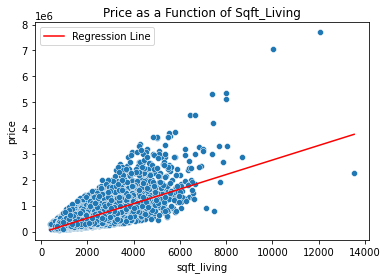

In [130]:
# Linearity

fig, ax = plt.subplots()

sns.scatterplot(x=X_train['sqft_living'], y=y_train['price'], ax=ax)

ax.set_title('Price as a Function of Sqft_Living')

sns.lineplot(x=X_train['sqft_living'], y=linreg.predict(X_train).reshape(-1), color='r', label='Regression Line')

ax.legend();

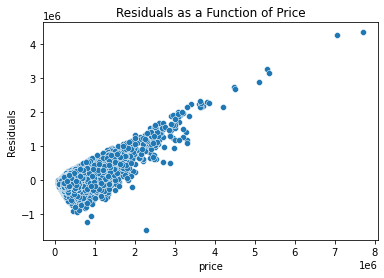

In [132]:
# Homoscedasticity & normality of residuals

residuals = y_train - linreg.predict(X_train)

fig, ax = plt.subplots()

ax.set_title('Residuals as a Function of Price')

ax.set_ylabel('Residuals')

sns.scatterplot(x=y_train['price'], y=residuals['price']);

As price increases, the error in our model increases. This does NOT look like homoscedasticity is satisifed. Let's also check a qq plot.

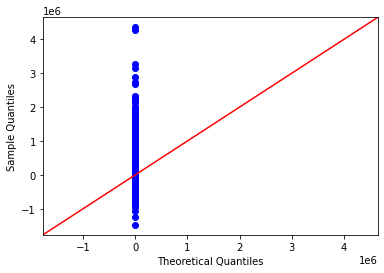

In [129]:
import statsmodels.api as sm

sm.qqplot(residuals, line='45');

The residuals are definitely not normally distributed.

## Using Statsmodels

In [133]:
# import necessary packages
import statsmodels.api as sm
from statsmodels.formula.api import ols

# build the formula string
outcome = 'y_train'
predictor = 'sqft_living'
formula = outcome + '~' + predictor

# pass formula string and concatenated training data to ordinary least squares
model = ols(formula=formula, data=pd.concat([X_train,y_train], axis=1)).fit()

# view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:05:17   Log-Likelihood:            -2.1003e+05
No. Observations:               15117   AIC:                         4.201e+05
Df Residuals:                   15115   BIC:                         4.201e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.379e+04   5282.288     -8.290      0.000   -5.41e+04   -3.34e+04
sqft_living   280.8724      2.317    121.199      0.000     276.330     285.415
==============================================================================
Omnibus:                    10451.928   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           399154.274
Skew:                           2.839   Prob(JB):                         0.00
Kurtosis:                      27.525   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

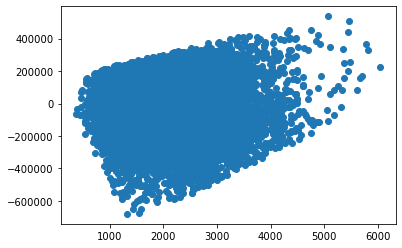

In [82]:
# checking assumptions - what do the residuals look like?

residuals = model.predict(X_train) - y_train

fig, ax = plt.subplots()

ax.scatter(X_train, residuals);

The residuals are huge! There is a little bit of a pattern in the residuals. Am I failing the normality of residuals assumption?

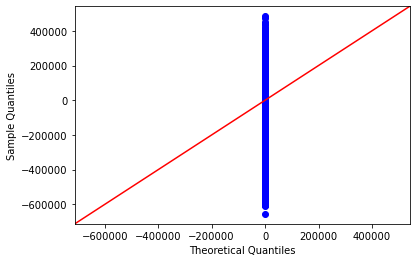

In [112]:
sm.qqplot(residuals, line='45');

Oh my goodness. The residuals are not distributed normally at all. How do I fix this?

In [86]:
# add next most correlated feature to model

features = ['sqft_living']
features.append('sqft_living15')

X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, features],
    data['price'],
    test_size=0.3,
    random_state=421,
    shuffle=True
)

In [88]:
# build the formula string
outcome = 'y_train'
predictors = X_train[features]
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

# pass formula string and concatenated training data to ordinary least squares
model = ols(formula=formula, data=pd.concat([X_train,y_train], axis=1)).fit()

# view the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     4826.
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:00:10   Log-Likelihood:            -1.9172e+05
No. Observations:               14307   AIC:                         3.834e+05
Df Residuals:                   14304   BIC:                         3.835e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.199e+04   4425.388     20.787      0.000    8.33e+04    1.01e+05
sqft_living     122.8647      2.560     47.992      0.000     117.847     127.883
sqft_living15    73.7981      3.205     23.027      0.000      67.516      80.080
==============================================================================
Omnibus:                      713.692   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              823.502
Skew:                           0.576   Prob(JB):                    1.51e-179
Kurtosis:                       3.237   Cond. No.                     9.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

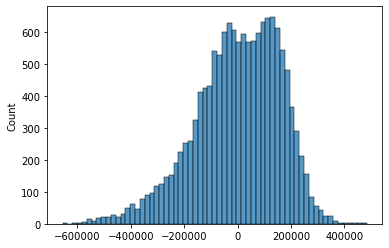

In [107]:
# the residuals LOOK normal

sns.histplot(residuals);

### One Hot Encoding

In [ ]:
# one hot encode zipcode

from sklearn.preprocessing import OneHotEncoder

zip_ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

zip_ohe.fit(X_train[['zipcode']])

new_zipcode_cols = zip_ohe.get_feature_names(input_features=['zipcode'])

X_train_ohe = pd.DataFrame(zip_ohe.fit_transform(X_train[['zipcode']]), columns = new_zipcode_cols,\
                          index = X_train.index)

X_train = pd.concat([X_train.drop('zipcode', axis=1), X_train_ohe], axis=1)